# Examine effect of TP53 Hotspot mutation on 14 proteins high during M phase, in Endometrial Cancer

#### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import cptac
import cptac.utils as ut

import seaborn as sns
import matplotlib.pyplot as plt

#Use Ovarian cancer object
co = cptac.Endometrial()

## Use parse hotspot utility to analyze TP53 hotspot mutation in Ovarian cancer

#### Get somatic mutation data from cptac

In [2]:
somatic_mutations = co.get_somatic_mutation()

#### Use parse hotspot utility

In [3]:
vis, binary, detailed, dictionary = ut.parse_hotspot('../../HotspotClusterFiles/UCEC.Somatic.WXS.v072518.b38.maf.3D_Proximity.pairwise.recurrence.l0.r10.clusters', somatic_mutations)

In [4]:
vis

,hotspot_id,patients_within
0,ABCG8,2.0
1,ADPRH,2.0
2,AGFG1,3.0
3,AGO2,2.0
4,ANAPC5,2.0
5,ANK1,2.0
6,ANK1_1,3.0
7,AOX1,3.0
8,APAF1,4.0
9,AR,4.0


As we can see, TP53 has 2 hotspots in Endometrial cancer

#### Select only TP53 Hotspots

In [5]:
#There are 5 TP53 hotspots
TP53_Hotspots = detailed[['TP53','TP53_1']]
TP53_Hotspots.head()

,TP53,TP53_1
sample_id,,
S001,Yes,No
S002,No,No
S003,No,No
S005,No,No
S006,No,Yes_HS


#### Make binary column for samples that have a TP53 Hotspot Mutation

In [6]:
TP53_Hotspots['Hotspot_Mutation'] = ''
for ind, row in TP53_Hotspots.iterrows():
    for col in TP53_Hotspots.columns:
        if row[col] == 'Yes_HS':
            TP53_Hotspots.loc[ind,'Hotspot_Mutation'] = 'TP53_Hotspot_Mutation'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

#### Grab only the binary yes/no hotspot mutation

In [7]:
binary_hotspots = TP53_Hotspots['Hotspot_Mutation']

#### Get Proteomic data, append Binary hotspot mutation column

In [8]:
#Use join omics to mutations
proteomics_df = co.join_omics_to_mutations(omics_genes=['CDC20','AURKA','KIFC1','CCNB1','ANLN','HMMR','KIF20A','AURKB','CCNB2','RRM2','PLK1','RACGAP1','CENPF','PRC1'], omics_df_name='proteomics', mutations_genes='TP53')

#Remove multiindex from df
#proteomics_df = co.reduce_multiindex(proteomics_df, levels_to_drop='Database_ID')

#Remove Non-Tumor Samples
proteomics_df = proteomics_df.loc[proteomics_df['Sample_Status'] == 'Tumor']

#Remove columns that are not needed
proteomics_df = proteomics_df.drop(['TP53_Location','Sample_Status'],axis=1)
proteomics_df['TP53_Hotspot_Mutation'] = binary_hotspots

#Show df
proteomics_df.head()

Name,CDC20_proteomics,AURKA_proteomics,KIFC1_proteomics,CCNB1_proteomics,ANLN_proteomics,HMMR_proteomics,KIF20A_proteomics,AURKB_proteomics,CCNB2_proteomics,RRM2_proteomics,PLK1_proteomics,RACGAP1_proteomics,CENPF_proteomics,PRC1_proteomics,TP53_Mutation,TP53_Mutation_Status,TP53_Hotspot_Mutation
Sample_ID,,,,,,,,,,,,,,,,,
S001,0.5460,NaN,0.0413,1.2900,0.6950,-0.298,0.6840,NaN,0.921,0.799,0.29500,0.299,0.599,0.3270,[Missense_Mutation],Single_mutation,
S002,0.0504,0.311,0.4150,1.0800,0.5750,0.280,0.7000,0.4560,0.392,1.210,1.01000,2.310,0.570,1.4900,[Wildtype_Tumor],Wildtype_Tumor,
S003,0.2370,NaN,-0.5360,0.5510,0.0534,0.120,0.0682,-0.0623,-0.477,0.000,0.30100,-0.193,0.138,-0.6590,[Wildtype_Tumor],Wildtype_Tumor,
S005,-0.3950,-0.798,-0.3750,-0.0836,-0.4880,-0.266,-0.0106,-0.2020,-0.146,-0.108,-0.00057,0.322,-0.284,0.0826,[Wildtype_Tumor],Wildtype_Tumor,
S006,1.5700,3.110,1.2800,1.7400,2.6900,2.320,0.9840,1.0900,1.230,2.880,2.46000,0.402,1.400,0.5380,[Missense_Mutation],Single_mutation,TP53_Hotspot_Mutation


####   Check types

In [9]:
types = []
for ind, row in proteomics_df.iterrows():
    for val in row['TP53_Mutation']:
        if val not in types:
            types.append(val)
            
print(types)

['Missense_Mutation', 'Wildtype_Tumor', 'Nonsense_Mutation', 'In_Frame_Del', 'Frame_Shift_Ins', 'Frame_Shift_Del', 'Splice_Site']


#### Classify every sample according to TP53 Mutation Status. Use: Wildtype, Hotspot_Missense, Other_Missense, Truncation

In [10]:
for ind, row in proteomics_df.iterrows():
    #Classify Hotspot Missense Mutations
    if row['TP53_Hotspot_Mutation'] == 'TP53_Hotspot_Mutation':
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Hotspot_Missense'
        
    #Classify Truncation Mutations
    if 'Frame_Shift_Ins' in row['TP53_Mutation'] or 'Frame_Shift_Del' in row['TP53_Mutation'] or 'Nonsense_Mutation' in row['TP53_Mutation']:
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Truncation'
        
    #Classify Wildtype
    if row['TP53_Mutation_Status'] == 'Wildtype_Tumor':
        proteomics_df.loc[ind, 'TP53_Categorical'] = 'Wildtype'
        
    #Classify Other Missense Mutations
    if row['TP53_Hotspot_Mutation'] != 'TP53_Hotspot_Mutation':
        if 'Missense_Mutation' in row['TP53_Mutation'] or 'In_Frame_Del' in row['TP53_Mutation'] or 'In_Frame_Ins' in row['TP53_Mutation'] or 'Splice_Site' in row['TP53_Mutation']:
            proteomics_df.loc[ind, 'TP53_Categorical'] = 'Other_Missense'

#Drop columns we no longer need, display df
proteomics_df = proteomics_df.drop(['TP53_Mutation', 'TP53_Mutation_Status', 'TP53_Hotspot_Mutation'], axis = 1)
proteomics_df

Name,CDC20_proteomics,AURKA_proteomics,KIFC1_proteomics,CCNB1_proteomics,ANLN_proteomics,HMMR_proteomics,KIF20A_proteomics,AURKB_proteomics,CCNB2_proteomics,RRM2_proteomics,PLK1_proteomics,RACGAP1_proteomics,CENPF_proteomics,PRC1_proteomics,TP53_Categorical
Sample_ID,,,,,,,,,,,,,,,
S001,0.54600,NaN,0.0413,1.2900,0.69500,-0.2980,0.68400,NaN,0.9210,0.7990,0.29500,0.2990,0.59900,0.32700,Other_Missense
S002,0.05040,0.31100,0.4150,1.0800,0.57500,0.2800,0.70000,0.4560,0.3920,1.2100,1.01000,2.3100,0.57000,1.49000,Wildtype
S003,0.23700,NaN,-0.5360,0.5510,0.05340,0.1200,0.06820,-0.0623,-0.4770,0.0000,0.30100,-0.1930,0.13800,-0.65900,Wildtype
S005,-0.39500,-0.79800,-0.3750,-0.0836,-0.48800,-0.2660,-0.01060,-0.2020,-0.1460,-0.1080,-0.00057,0.3220,-0.28400,0.08260,Wildtype
S006,1.57000,3.11000,1.2800,1.7400,2.69000,2.3200,0.98400,1.0900,1.2300,2.8800,2.46000,0.4020,1.40000,0.53800,Hotspot_Missense
S007,-0.06760,-1.65000,-0.4490,-0.6020,-0.66000,-0.3930,-0.68500,0.4000,-0.3190,-0.5200,-0.67100,-0.8290,-0.37600,-0.45300,Wildtype
S008,0.18100,NaN,-0.0925,0.8770,-0.13100,NaN,0.37200,-0.1460,0.1740,0.4340,0.23200,0.2490,0.27500,0.19100,Other_Missense
S009,2.03000,0.84800,1.2300,1.5600,1.82000,NaN,1.35000,2.5200,NaN,0.8070,1.60000,1.1800,1.72000,NaN,Truncation
S010,-0.50600,-1.73000,-1.0400,-0.4010,-0.58800,-0.6560,-2.27000,-0.9640,-1.0500,-1.0600,-1.20000,-1.8200,-0.96900,-1.15000,Wildtype


#### Reformat dataframe for plot

In [11]:
plotdf = pd.melt(proteomics_df, id_vars='TP53_Categorical', var_name='Protein', value_name='Abundance')
plotdf = plotdf.replace({'Hotspot_Missense':'Hotspot Missense','Other_Missense':'Other Missense'})
plotdf = plotdf.replace(to_replace=r'_proteomics', value='', regex=True)

### Make plot illustrating proteomic abundance

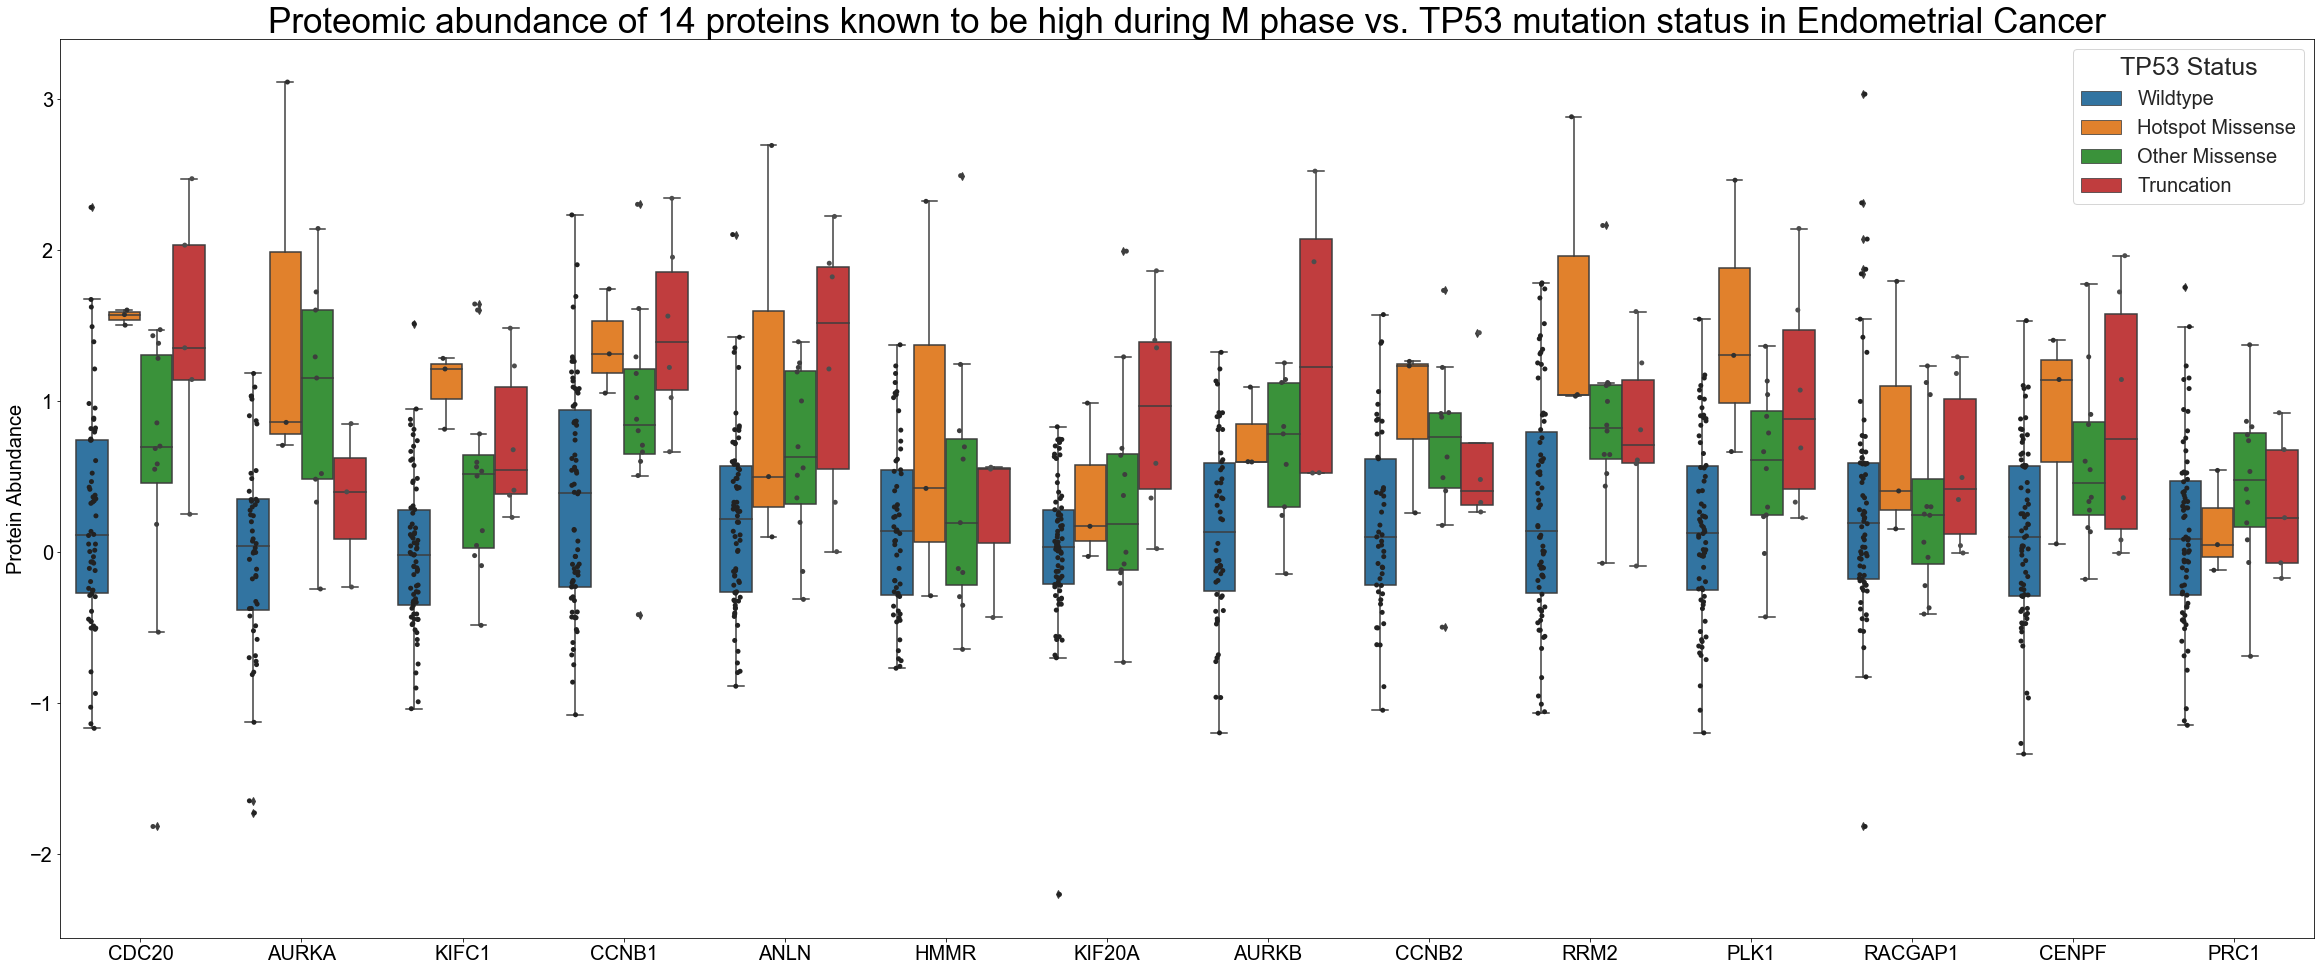

In [12]:
#Set dimensions and Colors
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Wildtype": "blue", "Hotspot Missense": "orange", "Other Missense":"green","Truncation":"red"}

#Make Boxplot
plot = sns.boxplot(data=plotdf, y = 'Abundance', x='Protein', hue='TP53_Categorical',
                   hue_order=['Wildtype','Hotspot Missense','Other Missense', 'Truncation'])

#Overlay Striplot
plot = sns.stripplot(data=plotdf, y = 'Abundance', x='Protein', hue='TP53_Categorical', color='.3', jitter=True, dodge=True,
                     hue_order=['Wildtype','Hotspot Missense','Other Missense', 'Truncation'])


#Change Style and label sizes
plot.tick_params(labelsize=20)
plot.set_xlabel('')
plot.set_ylabel('Protein Abundance', fontsize='20')
plot.set_title('Proteomic abundance of 14 proteins known to be high during M phase vs. TP53 mutation status in Endometrial Cancer', fontsize = '35')
sns.set_style("white")

#Adjust the Legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:4],['Wildtype','Hotspot Missense','Other Missense','Truncation'], title='TP53 Status', fontsize='20', frameon=True)
plot.get_legend().get_title().set_fontsize('25')



In [13]:
fig.savefig('TP53_Mitotic_HS.pdf')